# 2.1 신경망 첫만남
MNIST

MNIST : 28x28 흑백 손글씨 숫자 이미지를 0~9의 10개 범주로 분류하는 것, 6만개의 훈련 이미지와 1만개의 테스트 이미지로 구성
- 클래스(분류 문제의 category), 샘플(데이터 포인트), 레이블(특정 샘플의 클래스)


In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(train_images, train_labels)가 하나의 train set, (test_images, test_labels)가 하나의 test set\
이미지는 numpy array로 인코딩, label은 0~9까지의 숫자 배열, 이미지와 레이블은 1:1 대응

In [ ]:
print(train_images.shape)
print(len(train_labels))
print(train_labels[0:10])

(60000, 28, 28)
60000
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
print(test_images.shape)
print(len(test_labels))
print(test_labels[0:10])


(10000, 28, 28)
10000
[7 2 1 0 4 1 4 9 5 9]


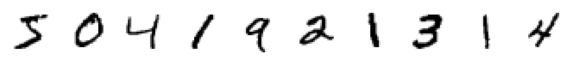

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10) :
  axs[i].imshow(train_images[i].reshape(28,28), cmap='gray_r')
  axs[i].axis('off')
plt.show()

train set을 네트워크를 주입 → 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습 → 마지막으로 test_images에 대한 예측을 실행하여 test_labels와 얼마나 맞는지 확인

In [ ]:
# 신경망 구조
from tensorflow import keras

network = keras.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(keras.layers.Dense(10, activation='softmax'))

- 신경망의 핵심 요소는 데이터 처리 필터로서 **층(layer)**, 층은 주어진 문제에서 의미 있는 표현(representation)을 입력된 데이터로부터 추출
- 대부분의 딥러닝은 간단한 층을 연결하여 구성, 점진적으로 데이터를 정제하는 형태
- 해당 예시에서는 완전 연결된 신경망층인 Dense층 2개가 연속되어 있음, 마지막 층은 도합 1의 10개의 확률값이 들어 있는 배열을 반환하는 softmax층이며 각 확률값은 투입된 이미지가 10개 숫자 클래스 중 하나에 속할 확률


신경망이 훈련되기 전 **compile** 단계에서 세 가지가 더 추가되어야 함
1. 손실 함수(loss) : 훈련데이터에서 신경망의 성능을 측정하고 네트워크가 올바른 방향으로 학습될 수 있도록 도와줌
2. 옵티마이저(optimizer) : 입력된 데이터와 손실함수를 바탕으로 네트워크(파라미터)를 업데이트하는 메커니즘
3. 모니터링 지표(metrics) : accuracy(정확히 분류한 개수/전체 개수)와 같이 훈련과 테스트 과정을 모니터링하는 지표

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 이미지 데이터 준비하기
train_images = train_images.reshape(-1,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(-1,28*28)
test_images = test_images.astype('float32')/255

In [ ]:
# one-hot encoding으로 label 준비하기 
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [ ]:
# model 훈련
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2526 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1003 - accuracy: 0.9710
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0663 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0485 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0363 - accuracy: 0.9889


In [ ]:
# model을 test set에 대해 평가한 결과
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print(test_loss, test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9788
0.07124529778957367 0.9787999987602234


# 2.2 신경망을 위한 데이터 표현

텐서 : 임의의 차원의 개수를 가지는 행렬의 일반화된 모습, 텐서의 축 개수를 **rank**라고도 함
- scalar (0D tensor) : float32, float64 타입의 숫자, 축의 개수=0
- vector (1D tensor) : 축의 개수=1, 이때 5차원 벡터는 축이 5개 아니라 하나의 축에 5개의 차원이 있는 뜻
- matrix (2D tensor) : 축의 개수=2, row와 column으로 이루어짐
- 3D tensor : 축의 개수=3

In [ ]:
# ndim : 넘파이 배열의 축axis 개수
import numpy as np
x0 = np.array(11)
print(x0.ndim, x0.shape)

x01 = np.array([11])
print(x01.ndim, x01.shape)

x1 = np.array([1,2,3])
print(x1.ndim, x1.shape)

x2 = np.array([[1,2],
               [3,4]])
print(x2.ndim, x2.shape)

x3 = np.array([[[1,2,3],
                [4,5,6]],
               [[1,2,3],
                [4,5,6]],
               [[1,2,3],
                [4,5,6]]])
print(x3.ndim, x3.shape)

0 ()
1 (1,)
1 (3,)
2 (2, 2)
3 (3, 2, 3)


tensor의 핵심 속성
- rank : nD tensor에는 n개의 축이 있음, **ndim** 속성에 저장
- shape : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 tuple
- datatype : float32, unit8 등 텐서에 저장된 데이터의 타입,  **dtype**속성에 저장

In [ ]:
print(train_images.shape)
print(train_images.dtype)

(60000, 784)
float32


**배치 차원**: 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플 축(샘플 차원)으로서 배치 차원이라고도함\
딥러닝에서는 한 번에 전체 데이터셋을 처리하지 않음, 그 대신 데이터를 작은 batch로 나눔\
만약 batch=128인 경우,  batch = train_images[:128], 그 다음 배치는 batch = train_images[128:256], ...

tensor의 실례
- 벡터 데이터 : (sample, features) 크기의 2D 텐서
- **time series** or sequence : (smp, timesteps, features) 크기의 3D 텐서
- **image** : (smp, height, width, channels(color)) 크기의 4D 텐서
- **video** : (smp, frames, height, width, channels(color))의 5D 텐서

1. 벡터 데이터 : 나이, 거주지, 소득으로 구성된 인구 통계 데이터, 각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터셋은 (100000, 3) 크기의 텐서로 저장
2. 시계열 또는 시퀀스 : 주식 가격 데이터의 경우 1분마다 현재 주식 가격, 지난 1분 동안의 고가와 저가를 저장한다면 250일 동안의 데이터는 (250, 390, 3)크기의 3D 텐서로 저장
3. 이미지 데이터 : 256x256 크기의 흑백 이미지에 대한 128개 배치는 (128,256,256,1) 크기의 4D 텐서에 저장, 컬러 이미지의 경우 (128,256,256,3)

# 2.3 텐서 연산

첫 번째 예제에서의 Dense는 keras.layers.Dense(512, activation='relu')\
이 층은 2D 텐서(smp, 512)를 입력으로 받고 입력 텐서의 새로운 표현인 2D 텐서를 반환하는 함수로 해석가능\
**output = relu(dot(W,input)+b)**   \
(W : 2D 텐서로서 가중치, b : 벡터로서 절편, relu(x)=max(x,0))




## 원소별 연산



원소별 연산은 텐서에 있는 각 원소에 독립적으로 적용\
일종의 for문을 통해 모든 원소에 대해 각각 연산해주는 것\
ReLu의 경우 : \
for i in range(x.shape[0]) :\
$\;$ for j in range(x.shape[1]) :\
$\;\;$ x[i,j] = max(x[i,j],0)

이와 같은 방법으로 넘파이 배열은 원소별 곱셈, 뺄셈을 할 수 있음

## Broadcasting

서로 다른 크기의 두 텐서를 연산하는 경우
1. 큰 텐서의 ndim에 맞도록 작은 텐서에 **브로드캐스딩 축**이 추가됨
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크게 맞도록 반복

ex. x의 크기는 (32,10)이고 y의 크기는 (10,)일 때, y에 비어 있는 첫 번째 축을 추가하여 크기를 (1,10)로 만들고 32번 반복하여 텐서 y의 크기는 (32,10)이 되어 x와 y의 크기가 동일해짐

In [ ]:
x = np.random.random((5,3,2))
y = np.random.random((3,2))
print(x + y)

[[[0.67827346 0.24159979]
  [0.98991994 1.18731953]
  [0.90540064 0.25662963]]

 [[1.15199443 0.61355994]
  [1.09298951 0.93676702]
  [0.58931881 1.08878849]]

 [[1.41805284 0.92211216]
  [0.54197457 0.45167372]
  [0.37275566 0.52365007]]

 [[1.19180555 0.33308424]
  [0.35839529 1.15493437]
  [0.67575657 1.01156371]]

 [[1.41394818 0.96186907]
  [0.99882592 0.45420564]
  [0.20156322 1.04388826]]]


## Tensor Dot product

두 벡터 사이의 점곱의 경우 **내적**을 의미\
for i in range(x.shape[0]) :\
$\;$ z+= x[i] * y[i]\
따라서 계산 결과는 scalar

행렬 x와 벡터 y 사이의 dot product의 경우 벡터가 반환\
len(x.shape)=2 ; len(y.shape)=1 ; x.shape[1]==y.shape[0]; \
for i in range(x.shape[0]):\
$\;$ for j in range(x.shape[1]):\
$\;\;$ z[i] += x[i,j] * y[j]\
이 경우 그냥 행렬과 벡터의 곱

또한 행렬 x와 행렬 y 사이의 dot product의 경우 행렬이 반환되며 차원은 (n,m)×(m,l)=(n,l)

일반적으로 고차원 텐서 간의 dp의 경우\
(a,b,c,d)×(d,)→(a,b,c)
(a,b,c,d)×(d,e)→(a,b,c,e)
등으로 계산됨

# 2.4 Gradient 기반 최적화

**output = relu(dot(W,input)+b)** \
에서 W는 kernel, b는 절편, 이런 가중치에는 훈련 데이터를 신경망에 노출시켜 학습된 정보가 담겨져 있음\
초기에 가중치 행렬은 의미 없는 표현, 즉 난수로 채워져 있다가(random initialization) 피드백 신호에 기반하여 가중치가 점점 조정됨

훈련은 다음과 같은 훈련 반복 루프 안에서 일어남
1. 훈련 샘플 x와 이에 대응되는 target y의 batch를 추출
2. x를 사용하여 신경망을 실행하고 y의 prediction을 구함
3. predicted y와 actual y의 차이를 측정하여 이 batch에 대한  loss를 계산
4. batch에 대한 loss가 조금씩 감소되도록 네트워크의 모든 가중치를 업데이트

이러한 루프 속에서 오차값은 매우 작아짐

4단계에서 개별적인 가중치의 값이 어떻게 변해야 하는지 아는 것이 중요\
이때 가장 효율적인 방법은 신경망 내 모든 연산이 미분가능하다는 것을 이용하여 가중치에 대한 loss의 gradient를 계산하는 것이 훨씬 더 좋은 방법



먼저 f(x)를 최소화하기 위해 Δx만큼 x를 업데이트하고 싶을 때 f의 변화율을 알고 있으면 됨, f(x)의 값을 감소시키고 싶다면 **변화율의 방향과 반대로** x를 조금 이동시켜야 함

Gradient는 텐선 연산의 변화율\
x : input vector, W : Matrix, y : target, loss : 손실함수(MAE, MSE)\
y_pred = dot(W,x)\
loss_value=loss(y_pred, y)\
여기서 x와 y가 given이라면 loss_value=f(W) 

W의 초기값을 W0라고 할 때, 포인트 W0에서 f의 변화율은 W와 같은 크기의 텐서인 **gradient(f)(W0)**

$$W1 = W0 - step\times \nabla f(W0) $$
여기서 step은 scale을 조정하기 위한 hyperparamete, W0에서 너무 벗어나지 않기 위해 스케일링 비율 step이 필요\ gradient의 반대방향으로 움직인다는 것은 기울기가 작아지는 곡면, 즉 낮은 위치로 이동된다는 것




**확률적 경사 하강법(SGD)**\
우리가 할 일은 변화율이 0이 되는 지점(∇f=0)을 모두 찾고 그 중에서 어떤 포인트의 함수 값이 가장 작은지 확인하는 것\
이때 랜덤한 batch data에서 현재 손실 값을 토대로 하여 조금씩 파라미터를 수정
1. 훈련 샘플 x와 이에 대응되는 target y를 추출
2. x를 사용하여 신경망을 실행하고 y의 prediction을 구함
3. predicted y와 actual y의 차이를 측정하여 이 batch에 대한  네트워크의 loss를 계산
4. 네트워크의 파라미터에 대한 loss ftn의 gradient를 계산 (**backward pass**)
5. gradient 반대 방향으로 파라미터를 조금 이동 (W -= step*∇f)



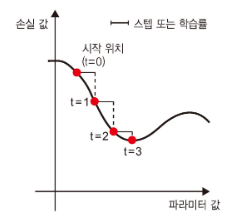

그림에서 볼 수 있듯이 step의 값을 적절하게 선택하는 것이 중요, 너무 작은 값을 택하면 곡선을 따라 내려가는데 너무 많은 반복(연산)이 필요하고 local min에 갇힐 수 있음, 반대로 너무 큰 값을 택하면 수렴하지 못하고 완전히 임의의 위치로 이동됨

SGD에는 미니 배치, true(단 하나의 데이터만 사용), 배치(모든 데이터를 사용) 등의 하위 범주 있음

딥러닝에서의 한 이슈로, ANN이 지역 최솟값에 쉽게 갇힐 것이라고 생각했지만 고차원 공간에서는 대부분 안장점으로 나타나고 지역 최솟값은 드문 것으로 나타남

업데이트할 다음 가중치를 계산할 때 현재 gradient 값만 보지 않고 이전에 업데이트된 가중치를 여러 방식으로 고려하는 SGD도 존재\
예를 들면 momentum SGD, Adagrad, RMSProp 등의 Optimizer\ 
물리학적 개념이 momentum은 SGD의 큰 문제인 수렴 속도와 지역 최소값을 해결하는데 사용됨, 모멘텀이 충분하면 공이 골짜기(local min)에 갇히지 않고 전역 최소값에 도달할 수 있음

past_velocity = 0\
momentum=0.1\
while loss < 0.01: \
$\;$ w, loss, gradient = get_current_parameters()\
$\;$ velocity = momentum * past_velocity $-$ learning\_rate * gradient # 모멘텀을 통해 현재 가속도(gradient)외에도 과거 가속도로 인한 현재 속도를 함께 고려하여 공이 움직임\
$\;$ w = w + momentum * past_velocity $-$ learning\_rate*gradient\
$\;$ past_velocity = velocity\
$\;$ update_parameter(w)

**역전파 알고리즘**
3개의 텐서 연산 a,b,c와 가중치 행렬 W1, W2, W3로 구성된 네트워크 f를 예로 들어보면,\
f(W1, W2, W3) = a(W1, b(W2, c(W3)))\
chain rule를 이용하여 
$$ (f(g(x)))'  = f'(g(x))×g'(x) $$
그런데 chain rule을 gradient 계산에 적용하여 **Backpropagation**이 탄생, loss value에 각 parameter가 기여한 정도를 계산하기 위해 연쇄 법칙을 적용하여 최상위 층에서 하위 층까지 거꾸로 진행

최근에는 tensorflow처럼 symbolic differentiation이 가능한 최신 프레임워크를 사용하여 변화율이 알려진 연산들로 연결되어 있으면 연쇄법칙을 적용하여 네트워크 파라미터와 그래디언트를 매핑하는 그래디언트를 계산할 수 있음, 이를 통해 그래디언트 함수를 호출하면 될뿐 정확한 역전파 공식을 유도할 필요가 없어짐

# 2.5 첫 번째 예제

핵심 단계
1. input, target 데이터 형성/전처리 (train-valid-test로 쪼개기)
2. 신경망 구조 생성(Sequential, add(layers))
3. compile(optimizer, loss ftn, metrics)
4. fit(input, target, epochs, batch_size)
5. evaluate(loss(accuracy) 측정) vs predict(개별 smp의 class별 확률값 계산)